In [ ]:
#import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE


In [ ]:
#upload dataset

from google.colab import files
uploaded = files.upload()

Saving creditcard.csv to creditcard.csv


In [ ]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
print("\nDataset shape:", df.shape)


Dataset shape: (284807, 31)


In [ ]:
print("\n missing values :", df.isnull().sum())


 missing values : Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


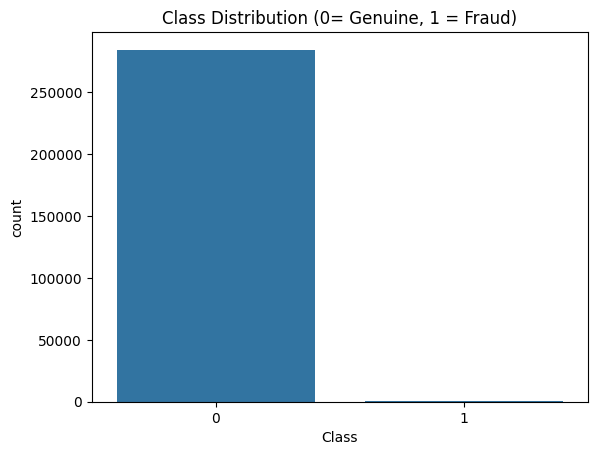


Genuine transaction:  {284315}

Fraudulent transaction: {492}


In [ ]:
#checking class balance

sns.countplot(x='Class', data=df)
plt.title('Class Distribution (0= Genuine, 1 = Fraud)')
plt.show()

fraud = df[df['Class']==1]
genuine = df[df['Class']==0]
print("\nGenuine transaction: ",{len(genuine)})
print("\nFraudulent transaction:",{len(fraud)})

In [ ]:
#data preprocessing

scaler = StandardScaler()
df['Amount'] = scaler.fit_transform(df[['Amount']])
df.drop(['Time'], axis=1 , inplace=True)

x= df.drop('Class', axis=1)
y= df['Class']

In [ ]:
#train test split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)


In [ ]:
#balance the data

smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

print("\nAfter SMOTE balancing:")
print(y_train_resampled.value_counts())




After SMOTE balancing:
Class
0    227451
1    227451
Name: count, dtype: int64


In [ ]:
#train the model

rf_model = RandomForestClassifier(n_estimators=10, random_state=42)
rf_model.fit(x_train_resampled, y_train_resampled)

#Evaluate the model
y_pred = rf_model.predict(x_test)
print("classification report :")
print (classification_report(y_test, y_pred, digits=4))


classification report :
              precision    recall  f1-score   support

           0     0.9997    0.9998    0.9998     56864
           1     0.8723    0.8367    0.8542        98

    accuracy                         0.9995     56962
   macro avg     0.9360    0.9183    0.9270     56962
weighted avg     0.9995    0.9995    0.9995     56962



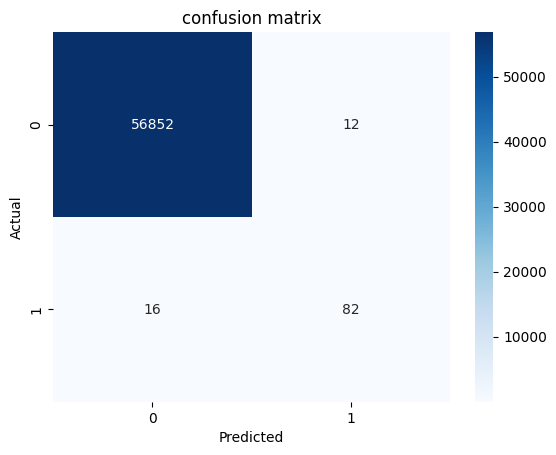

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("confusion matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()